Load all the pickle files containing preprocessed data

In [2]:
import pickle
import numpy as np 
import pandas as pd

with open("lncRNA_feature.pickle", 'rb') as file:
    lncRNA_feature=pickle.load(file)

with open("gdi.pickle", 'rb') as file:
    gdi=pickle.load(file)


with open("lda.pickle", 'rb') as file:
    lda=pickle.load(file)

with open("updated_dis.pickle", 'rb') as file:
    diseases=pickle.load(file)

with open("lncRNA_names.pickle", 'rb') as file:
    lncRNA_names=pickle.load(file)

with open("useful_genes.pickle", 'rb') as file:
    useful_genes=pickle.load(file)

with open("lncTarget.pickle", 'rb') as file:
    lncTarget=pickle.load(file)
    
with open("sequences.pickle", 'rb') as file:
    sequences=pickle.load(file)



with open("targetNames.pickle", 'rb') as file:
    targetNames=pickle.load(file)
    
with open("disease_genes.pickle", 'rb') as file:
    disease_genes=pickle.load(file)

    

with open("gip_dis.pickle", 'rb') as file:
    result_dis=pickle.load(file)

with open("gip_lnc.pickle", 'rb') as file:
    result_lnc=pickle.load(file)

with open("disease_feature.pickle", 'rb') as file:
    disease_feature=pickle.load(file)

with open("disease_genes_association.pickle", 'rb') as file:
    gdi=pickle.load(file)
with open("genes_names_relatedToDisease.pickle", 'rb') as file:
    genes=pickle.load(file)

with open("doid_dic.pickle", 'rb') as file:
    doid_dic=pickle.load(file)
with open("gene_pathway_matrix.pickle", 'rb') as file:
    gene_pathway_matrix=pickle.load(file)

with open("genes_matrix.pickle", 'rb') as file:
    genes_matrix=pickle.load(file)
with open("genes_func_sim.pickle", 'rb') as file:
    genes_func_sim=pickle.load(file)

with open("genes_gaussian_sim.pickle", 'rb') as file:
    genes_gaussian_sim=pickle.load(file)
doids=list(doid_dic.values())
disease_names=list(doid_dic.keys())

In [3]:
genes_gaussian_sim.shape

(13356, 13356)

Below is the function for finding the top 10 neighbours for a given node(can be lncRNA or disease)

In [4]:
import numpy as np
import numpy.linalg as LA
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import csv
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf


def topk(ma1,gip,nei):
    for i in range(ma1.shape[0]):
        ma1[i,i]=0
        gip[i,i]=0
    ma=np.zeros((ma1.shape[0],ma1.shape[1]))
    for i in range(ma1.shape[0]):
        if sum(ma1[i]>0)>nei:
            yd=np.argsort(ma1[i])
            ma[i,yd[-nei:]]=1
            ma[yd[-nei:],i]=1
        else:
            yd=np.argsort(gip[i])
            ma[i,yd[-nei:]]=1
            ma[yd[-nei:],i]=1
    return ma


Autoencoders for low dimensional representation, converted both lncRNA feature space and disease feature space into 512 dimensional space

In [5]:

d2=disease_feature[:,0:468]
d1=disease_feature[:,468:]

l1=lncRNA_feature[:,0:4458]
l2=lncRNA_feature[:,4458:4458*2]
l3=lncRNA_feature[:,4458*2:4458*3]

dd=np.hstack((d1,d2))
encoding_dim=512
input_img = Input(shape=(len(dd[0]),))
encoded_input = Input(shape=(encoding_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(936, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
decoder_layer = autoencoder.layers[-1]
encoder = Model(inputs=input_img, outputs=encoded)
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(dd,dd,  epochs=100, shuffle=True)
encoded_dis=encoder.predict(dd)




Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 0.1311
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0323
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0265
Epoch 4/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0221
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0179
Epoch 6/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0148
Epoch 7/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0130
Epoch 8/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0119
Epoch 9/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0114
Epoch 10/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0111
Epoch 11/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0109
Epoch 12/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0108
Epoch 13/100
15/15 [=====

In [ ]:
from tensorflow import keras

# Save the model
encoder.save("encoder_dis.h5")

In [ ]:
ll=lncRNA_feature
encoding_dim=512
input_img = Input(shape=(len(ll[0]),))
encoded_input = Input(shape=(encoding_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(4458*3, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
decoder_layer = autoencoder.layers[-1]
encoder = Model(inputs=input_img, outputs=encoded)
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(x, x, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
autoencoder.fit(ll,ll,  epochs=100, shuffle=True)
encoded_lnc=encoder.predict(ll)


In [ ]:
from tensorflow import keras

# Save the model
encoder.save("encoder_lnc.h5")

In [6]:
from keras.models import load_model
encoder = load_model("encoder_lnc.h5")
encoder_lnc=encoder.predict(lncRNA_feature)


140/140 [==============================] - 2s 11ms/step


In [ ]:
encoder_lnc.shape

In [13]:
encoded_lnc=encoder_lnc

In [ ]:
encoded_lnc.max()

Create top 10 neighbours, here gaussian kernel profile is use as a substitute in case any particular disease or lncRNA does not have defined features

In [7]:
lnc1=topk(l1,result_lnc,10)
lnc2=topk(l3,result_lnc,10)
dis1=topk(d1,result_dis,10)
dis2=topk(d2,result_dis,10)
gg=topk(genes_func_sim,genes_gaussian_sim,10)


In [8]:
gl=genes_matrix[:,0:4458]
gd=genes_matrix[:,4458:]


Creating adjacency matrix for all lncRNA and disease or in other words a graphical representation of entire disease and lncRNA space

In [9]:
def adj_matrix(lnc_dis_matrix, lnc_matrix, dis_matrix):
    mat1 = np.hstack((lnc_matrix, lnc_dis_matrix))
    mat2 = np.hstack((lnc_dis_matrix.T, dis_matrix))
    return np.vstack((mat1, mat2))


adj1=adj_matrix(lda,lnc1,dis1)
adj2=adj_matrix(lda,lnc2,dis2)

In [11]:
def adj_matrix(lda, ll, dd, gl, gd, gg):
    mat1 = np.hstack((ll, lda, gl.T))
    mat2 = np.hstack((lda.T, dd, gd.T))
    mat3 = np.hstack((gl, gd, gg))
    return np.vstack((mat1, mat2, mat3))


adj=adj_matrix(lda,lnc1,dis1,gl,gd,gg)
print(adj.shape)


(18282, 18282)


features variable represent as a node attribute, or in other words features of every lncRNA and disease

In [14]:

features=np.vstack((encoded_lnc,encoded_dis,np.zeros((13356, 512))))
features.shape


(18282, 512)

Below is the GCN (Graph COnvolutional Network representation) with 3 layers ( 2Graph Convolution layers and 1 attention layer) and linear activation function is used
Note that GCN is used not for prediction but for a better node representation as the aim of using GCN is that every node extract information from both the feature space .

There are 2 GCN implementation below which used the below information:
1. lncRNA: sequence information, disease: semantic information
2. lncRNA: based on lncRNA similarity with targets (proteins, miRNA, etc.), disease: similarity with genes

New approach

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import math
import torch
import time
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import torch.optim as optim

class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        self.reset_parameters()
        
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        
    def forward(self, input, adj):
 
        # Convolution operation
        support = torch.mm(input, self.weight)
        output = torch.mm(adj, support)
        return output


class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.input_dim = input_dim
        self.W_l = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_r = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_h = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_g = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.gamma = nn.Parameter(torch.FloatTensor([0]))  # trainable parameter γ
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.W_l)
        nn.init.xavier_uniform_(self.W_r)
        nn.init.xavier_uniform_(self.W_h)
        nn.init.xavier_uniform_(self.W_g)

    def forward(self, H, adj):
        # Compute attention scores
        H_l = torch.matmul(H, self.W_l)
        H_r = torch.matmul(H, self.W_r)
        S = torch.matmul(H_l, torch.transpose(H_r, 0, 1))

        # Apply softmax to normalize attention scores along the last dimension
        beta = F.softmax(S, dim=-1)

        # Weighted sum of input elements based on attention weights
        B = torch.matmul(beta, H)

        # Calculate attention feature
        O = torch.matmul(B, self.W_h)
        O = torch.matmul(O, self.W_g)

        # Interpolation step
        output = torch.matmul(adj,H) + self.gamma * O 

        return output
    
class GCN(nn.Module):
    def __init__(self, nfeat, nhid, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.bn1 = nn.BatchNorm1d(nhid)
        self.relu1 = nn.ReLU()
        self.gc2 = GraphConvolution(nhid, nhid)
        self.bn2 = nn.BatchNorm1d(nhid)
        self.relu2 = nn.ReLU()
        self.attention = AttentionLayer(nhid)

    def forward(self, x, adj):
        x = self.gc1(x, adj)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.gc2(x, adj)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.attention(x,adj)
        return x


def calculate_laplacian(adj):
    # Calculate the degree matrix
    degree = torch.sum(adj, dim=1)
    degree_matrix = torch.diag(degree)
    
    # Calculate the Laplacian matrix
    laplacian = degree_matrix - adj
    return laplacian

def adj_norm(adj):
    adj_hat = adj + torch.eye(adj.size(0), device=adj.device)

    # Compute degree matrix
    degree = torch.sum(adj_hat, dim=1)
    degree = torch.diag(degree)

    # Compute D^-0.5
    degree_inv_sqrt = torch.pow(degree, -0.5)
    degree_inv_sqrt[degree_inv_sqrt == float('inf')] = 0

    # Normalize adjacency matrix
    adj_normalized = torch.mm(torch.mm(degree_inv_sqrt, adj_hat), degree_inv_sqrt)
    
    return adj_normalized

model = GCN(nfeat=512, nhid=512, dropout=0.4)
reconstruction_criterion = nn.MSELoss()  # Reconstruction loss criterion

optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)


# Calculate Laplacian matrix
adj_tensor = torch.Tensor(adj)

# Training loop
t_total = time.time()
features_tensor = torch.Tensor(features)
adj=adj_norm(adj_tensor)

for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    output1 = model(features_tensor, adj)
    
    # Reconstruction Loss
    reconstruction_loss = reconstruction_criterion(output1, features_tensor)
    
    # Total Loss
    loss = reconstruction_loss
    
    # Backpropagation
    loss.backward()
    optimizer.step()
    
    print("Epoch: ", epoch, " Reconstruction Loss: ", reconstruction_loss.item())

print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))


In [ ]:
model.eval() 

node_output1 = model(features_tensor, adj_tensor).detach().numpy()
print("Node embeddings shape:", node_output1)

In [ ]:
torch.save(model, 'GCN_node1.pth')

In [ ]:
with open("GCN_node1.pickle", 'rb') as file:
    model=pickle.load(file)
features_tensor = torch.Tensor(features)
adj_tensor = torch.Tensor(adj1)
node_output1 = model(features_tensor, adj_tensor).detach().numpy()


In [ ]:
model=torch.load('GCN_node1.pth')
model.eval() 
node_output1 = model(features_tensor, adj_tensor).detach().numpy()


For prediction, all the known lncRNA disease associative nodes have taken, to remove the bias, equal number of unknown lncRNA disease associative nodes have also been taken as labels below. Corresponding features of nodes are extracted and combined from the above GCN representation.

In [ ]:
# features from lncRNA sequence information and semantic information is taken which is generated using GCN

lncRNA_feature=node_output1[0:4458]
disease_feature=node_output1[4458:]
print(lncRNA_feature.shape)
print(disease_feature.shape)

# Identify indices where value is 1 in lda
indices_1 = np.argwhere(lda == 1)

# Identify indices where value is 0 in lda
indices_0 = np.argwhere(lda == 0)
# Initialize arrays to store extracted rows and labels
X=[]
y = []
label=[]
# Extract rows for indices where value is 1
for idx in indices_1:
    i, j = idx
    a=lncRNA_feature[i]
    b=disease_feature[j]
    X.append(np.concatenate((a,b)))
    y.append(1)
    label.append((i,j))

# Extract rows for randomly selected indices where value is 0
for idx in np.random.choice(len(indices_0), len(indices_1), replace=False):
    i, j = indices_0[idx]
    a=lncRNA_feature[i]
    b=disease_feature[j]
    X.append(np.concatenate((a,b)))
    y.append(0)
    label.append((i,j))


X = np.array(X)
y = np.array(y)




In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, average_precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Assuming X and y are your feature matrix and labels
num_samples = X.shape[0]  # Assuming all datasets have the same number of samples
indices = np.arange(num_samples)
np.random.shuffle(indices)

Now, as I have combined mixture of features together, there are high chances that the features will contain a mix of linear and non-linear pattern.
That's why stack ensembl is used with various machine learning models where some models like (LR, linear SVM) are good for extracting linear features while other (RF, GB, MLP) good for extracting non linear features as well.
    

In [15]:
# This is the prediction using the nodes where bias is towards lncRNA sequence and disease semantic information



# Shuffling all datasets using the same shuffled indices
X_shuffled = X[indices]
y1 = y[indices]
X1 = X_shuffled
y = y1

# Models for binary classification
models1 = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(max_iter=300)  # Adjust parameters as needed
}

# Meta-model
meta_model1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Leave-One-Out Cross-Validation with shuffling
skf = StratifiedKFold(n_splits=5)  # StratifiedKFold for shuffling

predictions = {model_name: [] for model_name in models1}

scaler = StandardScaler()
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
output1={
     'Logistic Regression': [],
    'SVM': [],
    'Random Forest': [],
    'Gradient Boosting': [],
    'MLP': []  # Adjust parameters as needed
}
for train_index, test_index in skf.split(X1, y):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    X_train1_std = scaler.fit_transform(X_train1)
    X_test1_std = scaler.transform(X_test1)

    # Train and predict with each base model
    for model_name, model in models1.items():
        print(model_name)
        model.fit(X_train1_std, y_train)
        y_pred_proba = model.predict_proba(X_test1_std)[:, 1]
        predictions[model_name].extend(y_pred_proba)
        output1[model_name].append((y_test,y_pred_proba))


Logistic Regression


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP


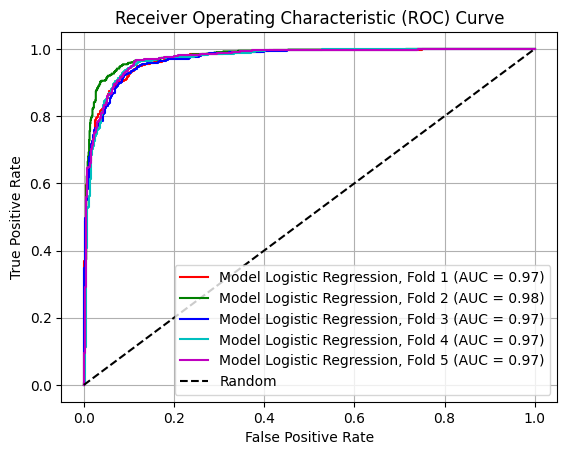

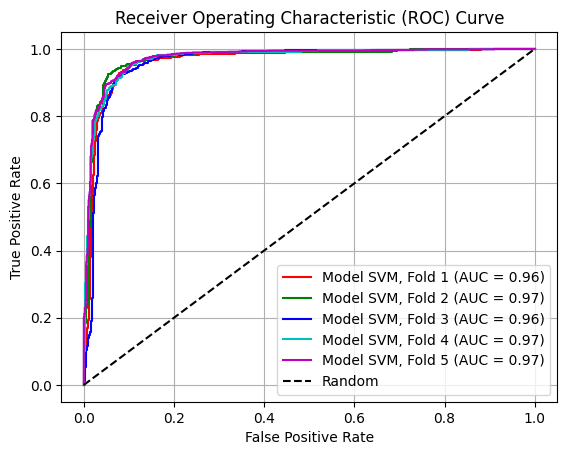

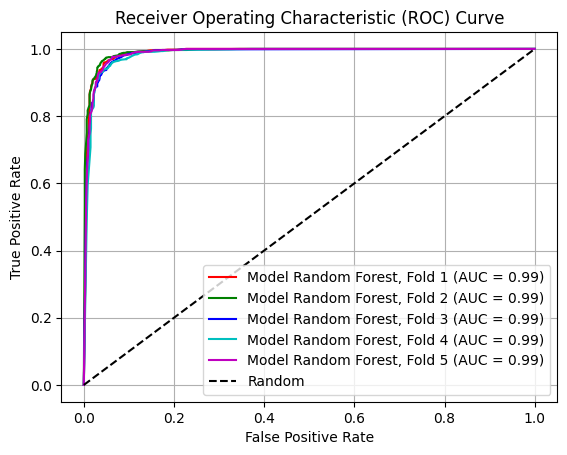

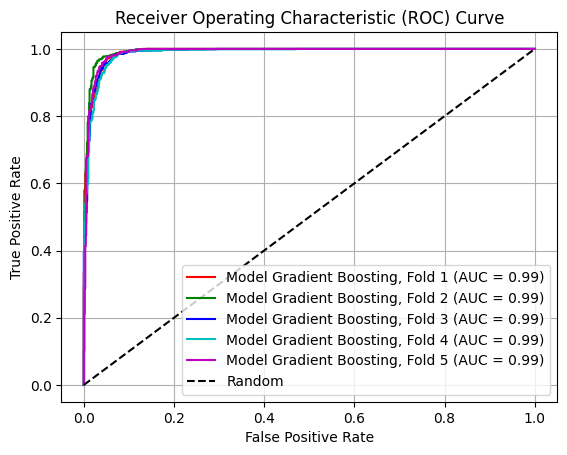

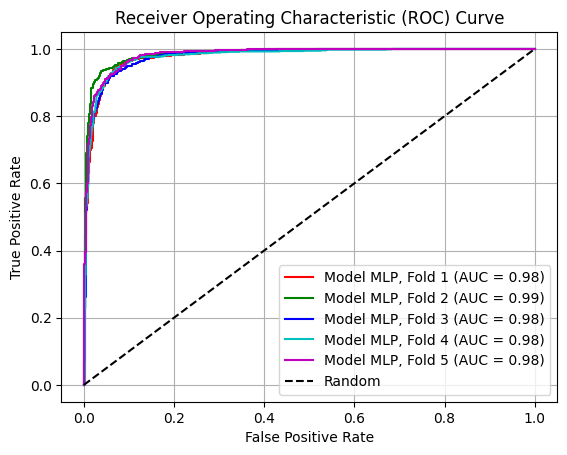

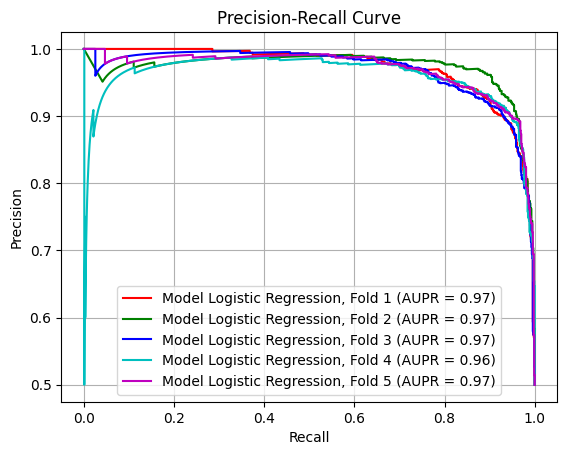

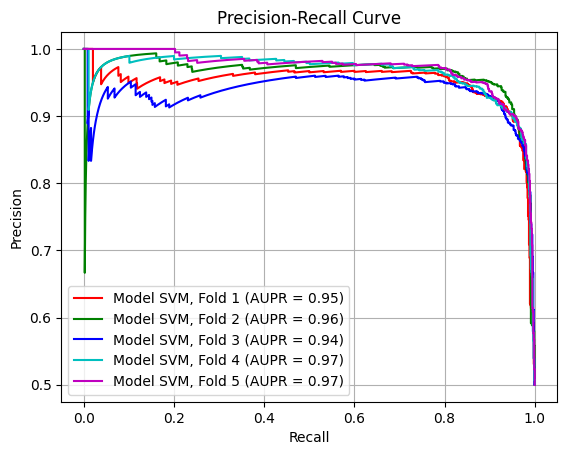

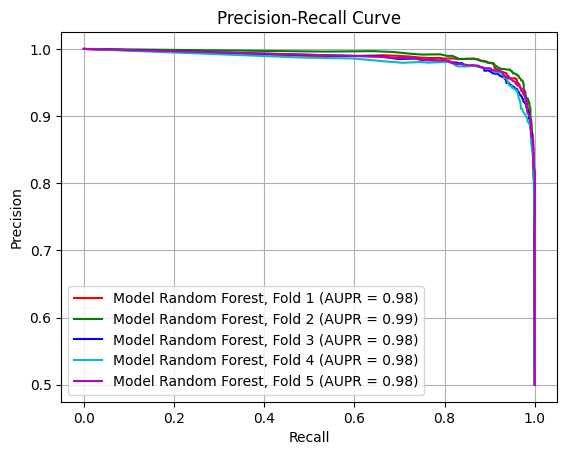

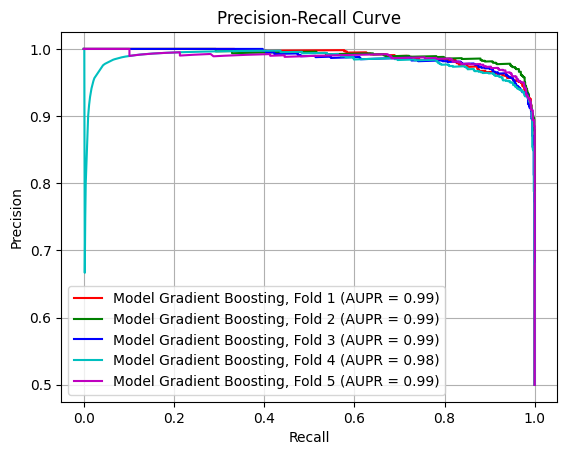

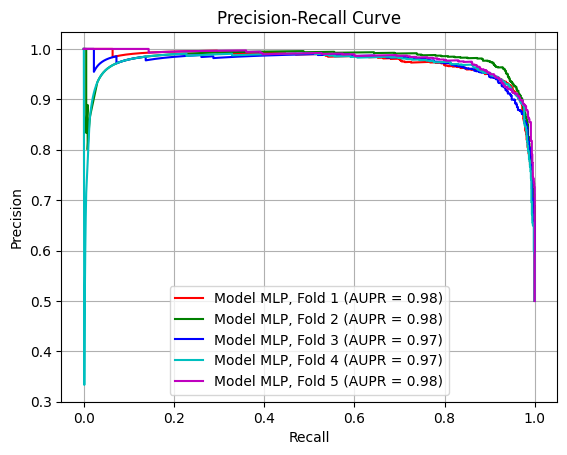

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming output1 contains ROC curve and Precision-Recall curve data for each model and fold

colors = ['r', 'g', 'b', 'c', 'm']  # List of colors for different models
model_names = list(output1.keys())  # List of model names
num_folds = 5  # Number of folds

# Plot ROC curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        plt.plot(fpr, tpr, label=f'Model {model_name}, Fold {j+1} (AUC = {roc_auc:.2f})', color=colors[j])

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Precision-Recall curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        aupr = average_precision_score(y_test, y_pred_proba)
        plt.plot(recall, precision, label=f'Model {model_name}, Fold {j+1} (AUPR = {aupr:.2f})', color=colors[j])

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()



Meta-Model Metrics:
ROC AUC: 0.9957
Accuracy: 0.9689
Precision: 0.9580
Recall: 0.9808
F1-score: 0.9693
MCC: 0.9381
AUPR: 0.9956


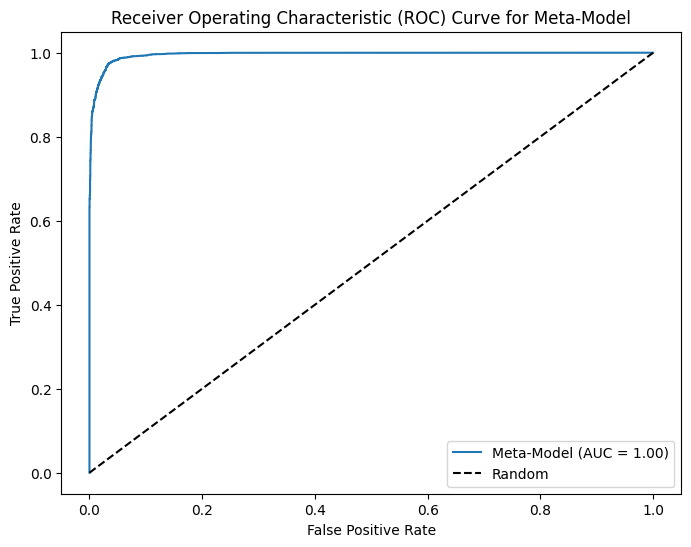

In [23]:

# Create input features for the meta-model
meta_X = np.column_stack([predictions[model_name] for model_name in models1])

# Train the meta-model
meta_model1.fit(meta_X, y)

# Evaluate the meta-model
y_meta_pred_proba = meta_model1.predict_proba(meta_X)[:, 1]
y_meta_pred = (y_meta_pred_proba >= 0.5).astype(int)

# Display evaluation metrics for the meta-model
roc_auc_meta = roc_auc_score(y, y_meta_pred_proba)
accuracy_meta = accuracy_score(y, y_meta_pred)
precision_meta = precision_score(y, y_meta_pred)
recall_meta = recall_score(y, y_meta_pred)
f1_meta = f1_score(y, y_meta_pred)
mcc_meta = matthews_corrcoef(y, y_meta_pred)
aupr_meta = average_precision_score(y, y_meta_pred_proba)

print("\nMeta-Model Metrics:")
print(f"ROC AUC: {roc_auc_meta:.4f}")
print(f"Accuracy: {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1-score: {f1_meta:.4f}")
print(f"MCC: {mcc_meta:.4f}")
print(f"AUPR: {aupr_meta:.4f}")

# Plot ROC curve for the meta-model
fpr_meta, tpr_meta, thresholds_meta = roc_curve(y, y_meta_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_meta, tpr_meta, label=f'Meta-Model (AUC = {roc_auc_meta:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Meta-Model')
plt.legend()
plt.show()


In [28]:
with open("scaler1.pickle", 'wb') as file:
    pickle.dump(scaler, file)

In [29]:
with open("base_models1.pickle", 'wb') as file:
    pickle.dump(models1, file)

with open("meta_model1.pickle", 'wb') as file:
    pickle.dump(meta_model1, file)


In [24]:
y_pred1=y_meta_pred_proba
y1=y_meta_pred


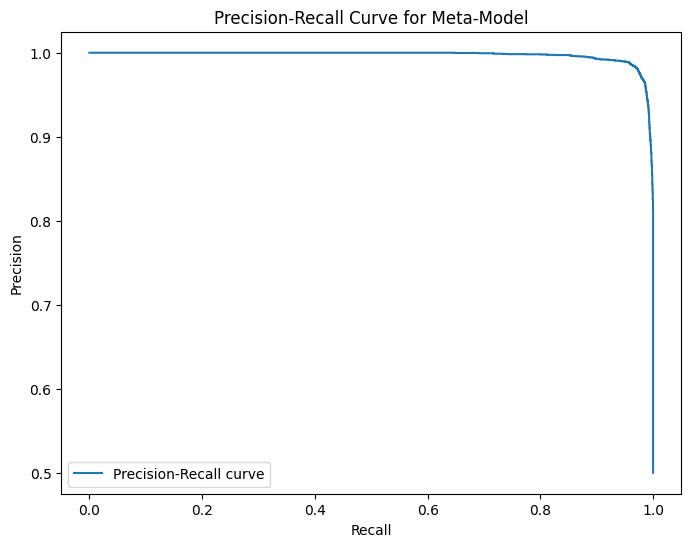

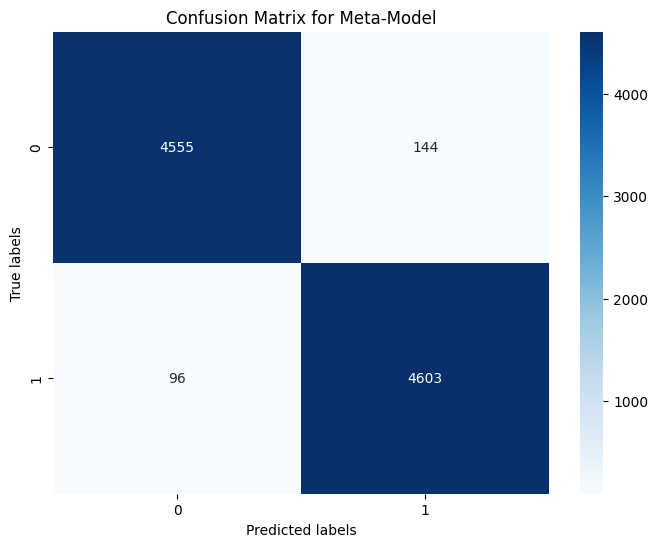

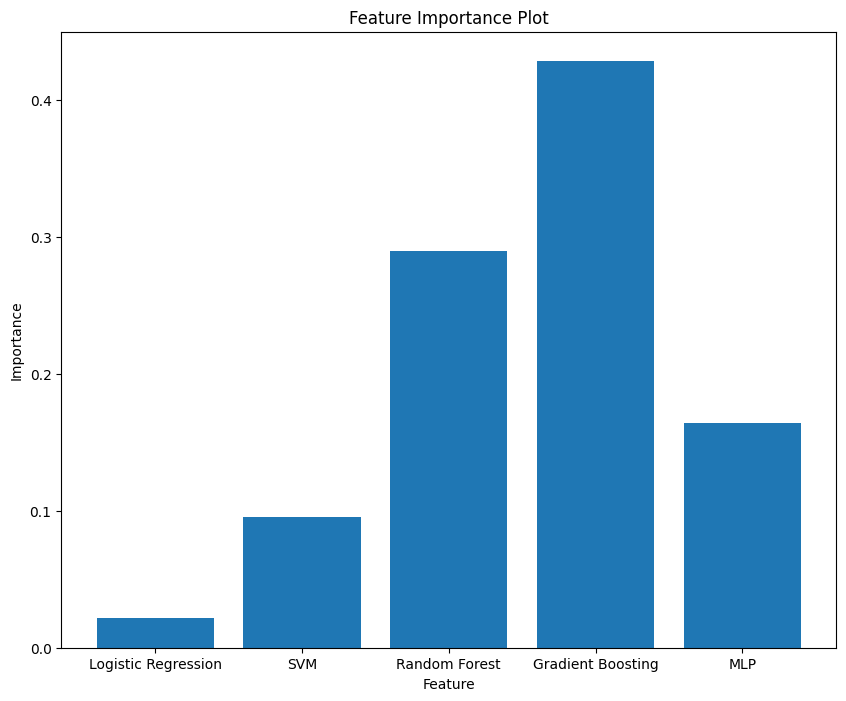

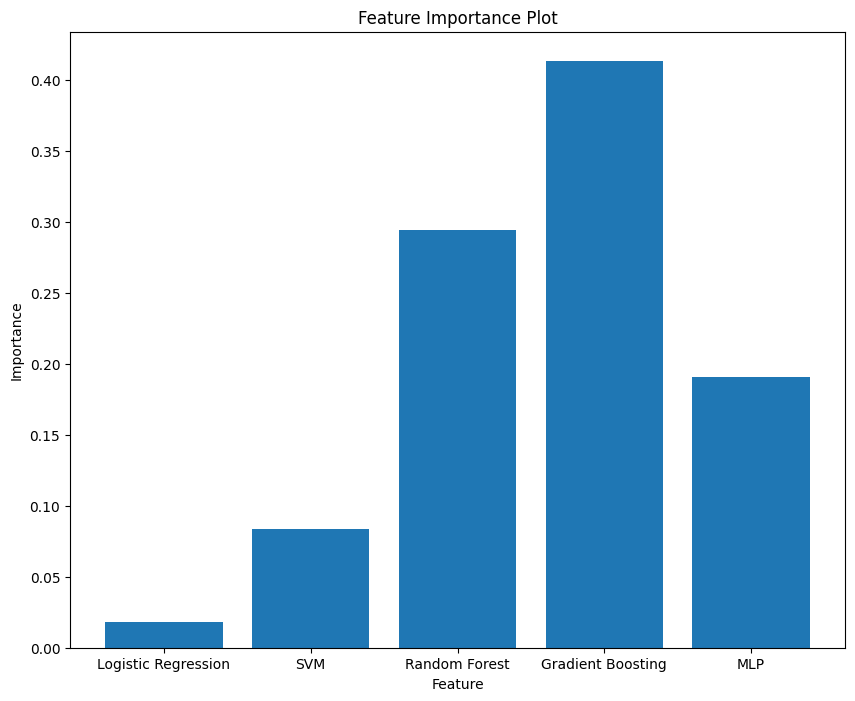

In [35]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
import seaborn as sns

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, y_meta_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Meta-Model')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_meta_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Meta-Model')
plt.show()

model_name=['Logistic Regression',
    'SVM',
    'Random Forest',
    'Gradient Boosting',
    'MLP']
# Feature Importance Plot
if hasattr(meta_model1, 'feature_importances_'):
    feature_importances = meta_model1.feature_importances_
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(feature_importances)), feature_importances, align='center')
    plt.xticks(range(len(feature_importances)), model_name)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance Plot')
    plt.show()
else:
    print("The meta-model does not support feature importances.")





